# Section 1

In [ ]:
import warnings
warnings.filterwarnings("ignore")


## Loading Data

In [1]:
import sklearn.datasets

# Loading the dataset
iris = sklearn.datasets.load_iris()

In [2]:
# Extracting features and labels and ensuring that labels are one-hot encoded

X = iris.data
y = iris.target

print("Shape of data: ",X.shape)
print("Shape of labels: ",y.shape)

# Performing one-hot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np

enc = OneHotEncoder()
y = enc.fit_transform(y[:, np.newaxis]).toarray() 
#np.newaxis is used to increase the dimension of the existing array by one more dimension, when used once. Thus, 1D array will become 2D array.
#toarray() is used to convert the sparse matrix to dense matrix
#fit_transform() is used to fit the data and then transform it

print("Shape of labels after one-hot encoding: ",y.shape)
print("Count of each class: ",y.sum(axis = 0))

Shape of data:  (150, 4)
Shape of labels:  (150,)
Shape of labels after one-hot encoding:  (150, 3)
Count of each class:  [50. 50. 50.]


In [3]:
# Train-test split (80-20 split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Normalizing the data to [0,1] using standard scaling
from sklearn.preprocessing import MinMaxScaler

print("First 5 rows of training data before scaling: \n",X_train[:5])

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# MinMaxScaler formula: X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
#                       X_scaled = X_std * (max - min) + min

print("First 5 rows of training data after scaling: \n",X_train[:5])

First 5 rows of training data before scaling: 
 [[4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]]
First 5 rows of training data after scaling: 
 [[0.08823529 0.66666667 0.         0.04166667]
 [0.41176471 1.         0.0877193  0.125     ]
 [0.70588235 0.45833333 0.59649123 0.54166667]
 [0.14705882 0.58333333 0.10526316 0.04166667]
 [0.02941176 0.5        0.05263158 0.04166667]]


## Model training and evaluation

Model:
- Input layer: 4 neurons (for 4 features).
- Hidden layer: 16 neurons, ReLU activation.
- Output layer: 3 neurons (for each class), softmax activation.

Hyperparameters:
- Loss function: Categorical cross-entropy.
- Optimizer: Adam.
- Learning rate: 0.001.
- Batch size: 32.
- Epochs: 50.


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense

# Clear any existing model in memory
keras.backend.clear_session()

# Defining the MLP model
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.BinaryCrossentropy())

model.summary()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 131 (524.00 B)

 Trainable params: 131 (524.00 B)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Training the model
epochs = 50
batch_size = 32
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.1)
print("Finished training")

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7189 - val_loss: 0.7235
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7142 - val_loss: 0.7186
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7106 - val_loss: 0.7139
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7030 - val_loss: 0.7095
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.7000 - val_loss: 0.7054
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6931 - val_loss: 0.7015
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6937 - val_loss: 0.6978
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6891 - val_loss: 0.6942
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6843 - val_loss: 0.6907
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6798 - val_loss: 0.6874
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6806 - val_loss: 0.6842
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6773 - val_loss: 0.6811
Epoch 13/50

In [7]:
# Evaluating the model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = model.predict(X_test)
print("First 5 predictions: \n",y_pred[:5])
print("First 5 actual: \n",y_test[:5])

# Converting the one-hot encoded vectors to a single class
y_pred = np.argmax(y_pred, axis=1)
y_test_n = np.argmax(y_test, axis=1)

accuracy=accuracy_score(y_test_n, y_pred)
precision=precision_score(y_test_n, y_pred, average='weighted')  # average='weighted' is used to calculate the precision for each class and then average it
recall=recall_score(y_test_n, y_pred, average='weighted')
f1=f1_score(y_test_n, y_pred, average='weighted')

print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1 Score: ",f1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
First 5 predictions: 
 [[0.30885315 0.31301546 0.37813133]
 [0.458517   0.23406757 0.3074154 ]
 [0.2881889  0.27570006 0.43611115]
 [0.310501   0.31172475 0.37777424]
 [0.30857527 0.29848796 0.39293677]]
First 5 actual: 
 [[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
Accuracy:  0.7
Precision:  0.535
Recall:  0.7
F1 Score:  0.5935483870967742


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


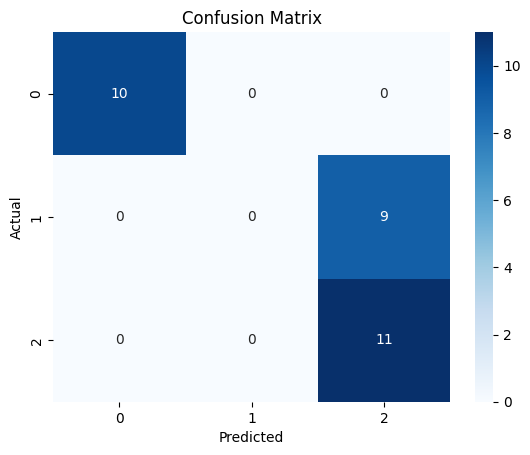

In [8]:
# Heatmap for confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_n, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

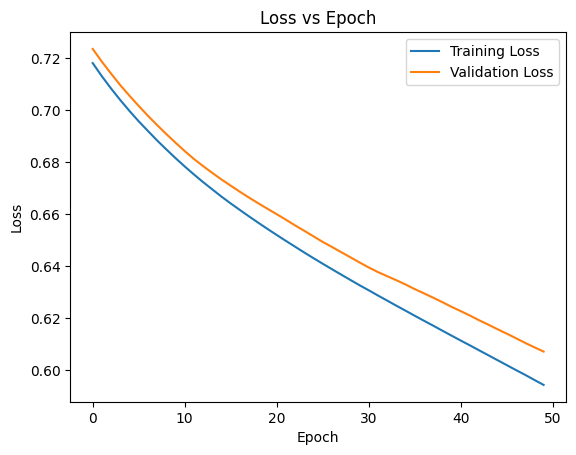

In [9]:
# Plotting the training and validation losses
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.savefig('loss_vs_epoch.png')
plt.show()

## Logging with Weights and Biases

**Logging the following details:**
- Model architecture: Number of layers, neurons, activation functions.
- Hyperparameters: Learning rate, batch size, number of epochs.
- Training and validation loss per epoch.
- Final evaluation metrics.
- Confusion matrix and loss curve visualizations.

In [10]:
# Logging using weights and biases
import wandb

# Take key from API.txt
with open('API.txt', 'r') as file:
    api_key = file.read()
wandb.login(key=api_key)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/rishanksoni/.netrc
wandb: Currently logged in as: rishisoniandsoni (rishisoniandsoni-iit-) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [11]:
# Logging the model to weights and biases

# Initialize Weights & Biases
wandb.init(project="Asgn6")

# Log model architecture details
model_config = {
    "num_layers": len(model.layers),
    "layers": [layer.__class__.__name__ for layer in model.layers],
    "neurons": [layer.units if hasattr(layer, 'units') else None for layer in model.layers], 
    "activations": [layer.activation.__name__ for layer in model.layers if hasattr(layer, 'activation')],
}
wandb.config.update(model_config)

# Log hyperparameters
hyperparams = {
    "learning_rate": model.optimizer.learning_rate.numpy(),
    "batch_size": batch_size,
    "epochs": epochs,
}
wandb.config.update(hyperparams)

# Log training and validation loss per epoch
history_data = {"epoch": list(range(1, len(history.history['loss']) + 1)),
                "train_loss": history.history["loss"],
                "val_loss": history.history["val_loss"]}
for epoch, train_loss, val_loss in zip(*history_data.values()):
    wandb.log({"epoch": epoch, "train_loss": train_loss, "val_loss": val_loss})

# Final evaluation metrics
wandb.log({
    "accuracy": float(accuracy),
    "precision": float(precision),
    "recall": float(recall),
    "f1_score": float(f1)
}) 


# Log pre-generated confusion matrix
wandb.log({"confusion_matrix": wandb.Image("confusion_matrix.png")})

# Log pre-generated loss curve
wandb.log({"loss_curve": wandb.Image("loss_vs_epoch.png")})


# Finish logging
wandb.finish()

accuracy,▁
epoch,▁▁▁▁▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
f1_score,▁
precision,▁
recall,▁
train_loss,██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁
val_loss,██▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▁▁▁▁
accuracy,0.7
epoch,50
f1_score,0.59355
precision,0.535


# Task 2


Use the model trained in the previous section.
Train the model on the batch size of [2 & 4], learning rate [1e-3 and 1e-5], and epochs [1, 3, and 5].
Train the model and measure the accuracy and F1 over the test set. Plot the confusion matrix over the test-set predictions.
Plot using the truth labels and predicted labels in matplotlib. 
Show the inputs, prediction, and truth values for five samples from the test set.



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Define parameters for grid search
param = {
    'batch_size': [2, 4],
    'learning_rate': [0.001, 1e-5],
    'epochs': [1, 3, 5]
}

results = []
for batch_size in param['batch_size']:
    for learning_rate in param['learning_rate']:
        for epochs in param['epochs']:
            print(f"\nTraining model with batch_size: {batch_size}, learning_rate: {learning_rate}, epochs: {epochs}")
            keras.backend.clear_session()

            model = Sequential()
            model.add(Dense(16, input_dim=4, activation='relu'))
            model.add(Dense(3, activation='softmax'))

            model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.BinaryCrossentropy())


            # Training the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, 
                              verbose=1, validation_split=0.1)
            
            # Evaluating the model
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)

            # Calculate metrics
            accuracy = accuracy_score(y_test_classes, y_pred_classes)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
            
            # Store results
            results.append({
                'batch_size': batch_size,
                'learning_rate': learning_rate,
                'epochs': epochs,
                'accuracy': accuracy,
                'f1': f1
            })
            # Storing the training and validation losses with par
            results[-1]['train_loss'] = history.history['loss']
            results[-1]['val_loss'] = history.history['val_loss']
            
            # store y_pred_classes and y_test_classes for confusion matrix
            results[-1]['y_pred_classes'] = y_pred_classes
            results[-1]['y_test_classes'] = y_test_classes
            

            # Show 5 sample predictions
            print("\nSample predictions:")
            print("Input Features | True Label | Predicted Label")
            print("-" * 50)
            for i in range(5):
                true_label = y_test_classes[i]
                pred_label = y_pred_classes[i]
                features = X_test[i]
                print(f"{features} | {true_label} | {pred_label}")






Training model with batch_size: 2, learning_rate: 0.001, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6670 - val_loss: 0.6363
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 1
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2

Training model with batch_size: 2, learning_rate: 0.001, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6932 - val_loss: 0.6670
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - loss: 0.6611 - val_loss: 0.6356
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.6272 - val_loss: 0.6031
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1

Training model with batch_size: 2, learning_rate: 0.001, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7500 - val_loss: 0.7312
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6971 - val_loss: 0.6802
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.6541 - val_loss: 0.6463
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.6152 - val_loss: 0.6227
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 787us/step - loss: 0.5984 - val_loss: 0.6048
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6889 - val_loss: 0.6835
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7432 - val_loss: 0.7482
Epoch 2/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7270 - val_loss: 0.7475
Epoch 3/3
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.7380 - val_loss: 0.7467
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0

Training model with batch_size: 2, learning_rate: 1e-05, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6174 - val_loss: 0.6129
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - loss: 0.6278 - val_loss: 0.6125
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - loss: 0.6239 - val_loss: 0.6120
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - loss: 0.6243 - val_loss: 0.6116
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - loss: 0.6244 - val_loss: 0.6112
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2

Training model with batch_size: 4, learning_rate: 0.001, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6365 - val_loss: 0.6061
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 1
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 1
[0.5        0.375      0.61403509 0.58333333] | 1 | 1
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 1

Training model with batch_size: 4, learning_rate: 0.001, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7114 - val_loss: 0.7092
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6993 - val_loss: 0.6817
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6732 - val_loss: 0.6604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0

Training model with batch_size: 4, learning_rate: 0.001, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6737 - val_loss: 0.6498
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6444 - val_loss: 0.6308
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6220 - val_loss: 0.6167
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6094 - val_loss: 0.6039
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5931 - val_loss: 0.5926
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 2
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 1


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7559 - val_loss: 0.7772
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 3
Epoch 1/3


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7106 - val_loss: 0.7341
Epoch 2/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7043 - val_loss: 0.7339
Epoch 3/3
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7105 - val_loss: 0.7337
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 0
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 0
[1.         0.25       1.03508772 0.91666667] | 2 | 0
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 0

Training model with batch_size: 4, learning_rate: 1e-05, epochs: 5
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7539 - val_loss: 0.7626
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7625 - val_loss: 0.7622
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7532 - val_loss: 0.7618
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7521 - val_loss: 0.7614
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7615 - val_loss: 0.7610
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Sample predictions:
Input Features | True Label | Predicted Label
--------------------------------------------------
[0.52941176 0.33333333 0.64912281 0.45833333] | 1 | 2
[0.41176471 0.75       0.12280702 0.08333333] | 0 | 2
[1.         0.25       1.03508772 0.91666667] | 2 | 2
[0.5        0.375      0.61403509 0.58333333] | 1 | 0
[0.73529412 0.33333333 0.66666667 0.54166667] | 1 | 2


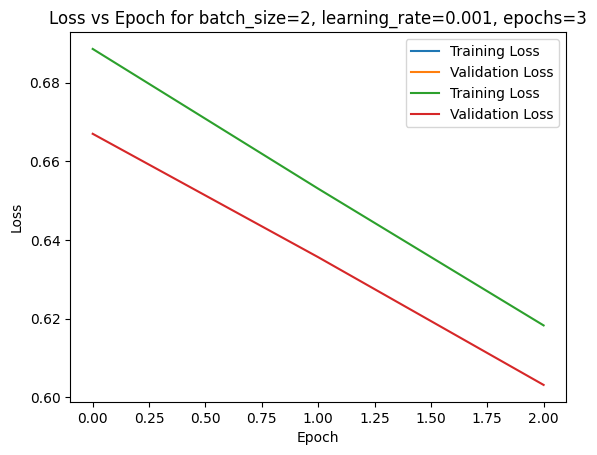

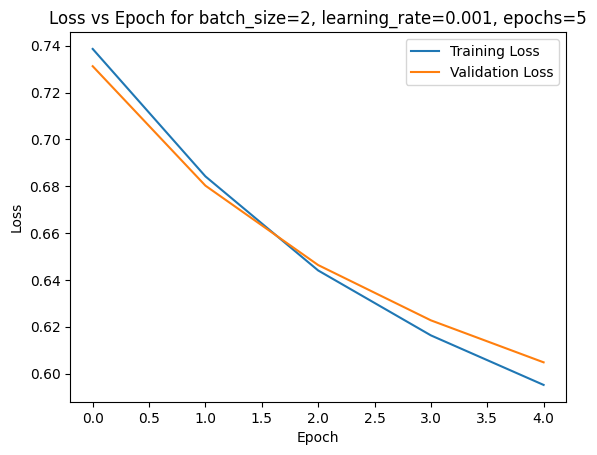

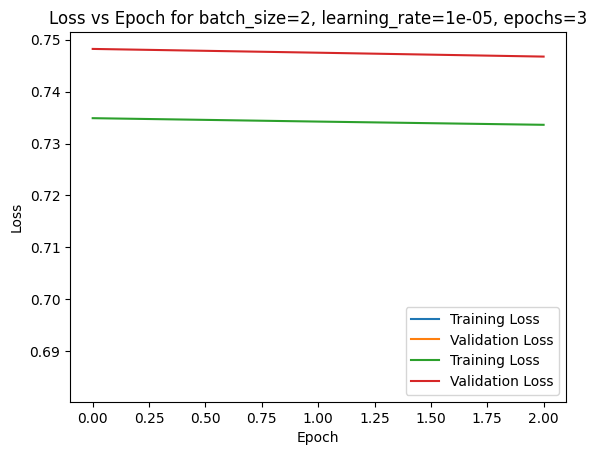

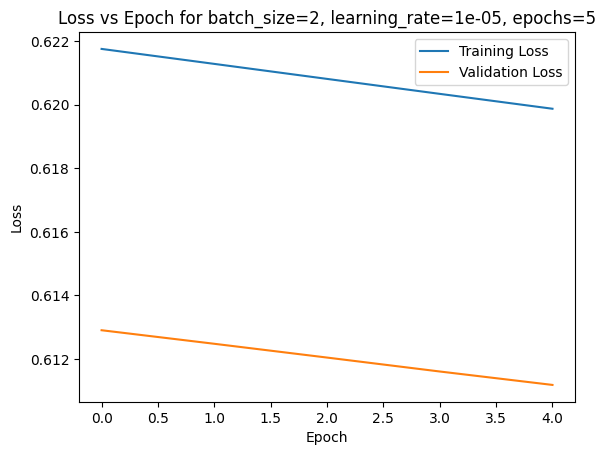

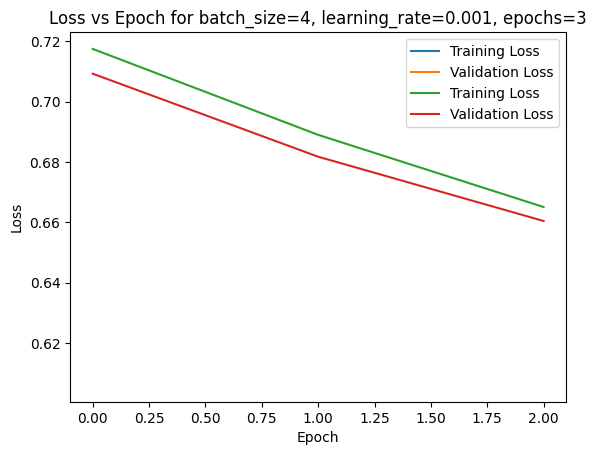

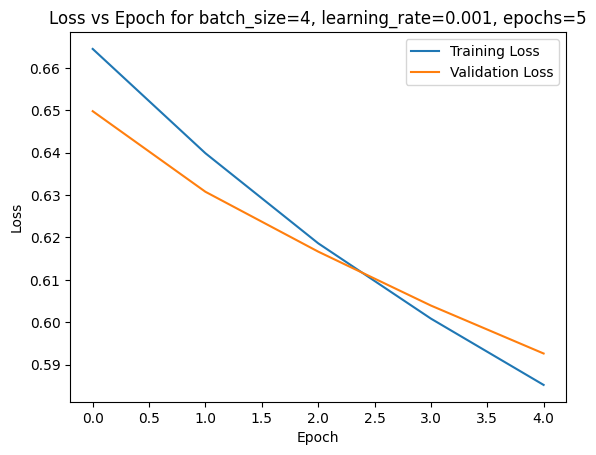

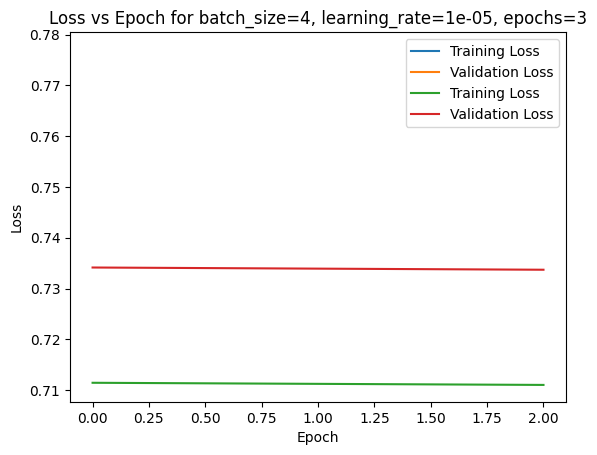

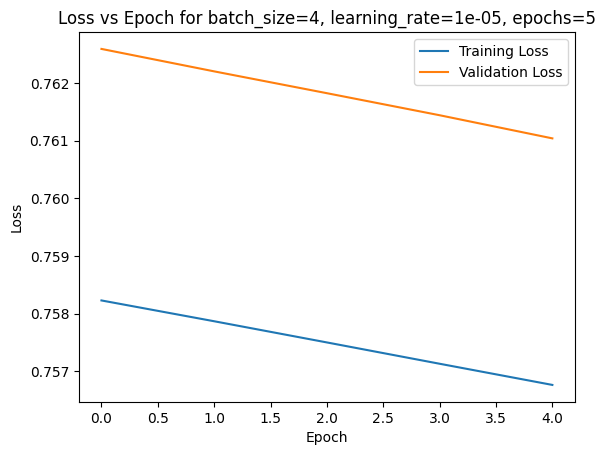

In [13]:
# Plotting seprate the training and validation losses for all hyperparameter combinations
for result in results:
    plt.plot(result['train_loss'], label='Training Loss')
    plt.plot(result['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    if result['epochs'] == 1:
        continue

    plt.title(f'Loss vs Epoch for batch_size={result["batch_size"]}, learning_rate={result["learning_rate"]}, epochs={result["epochs"]}')
    plt.legend()
    plt.show()





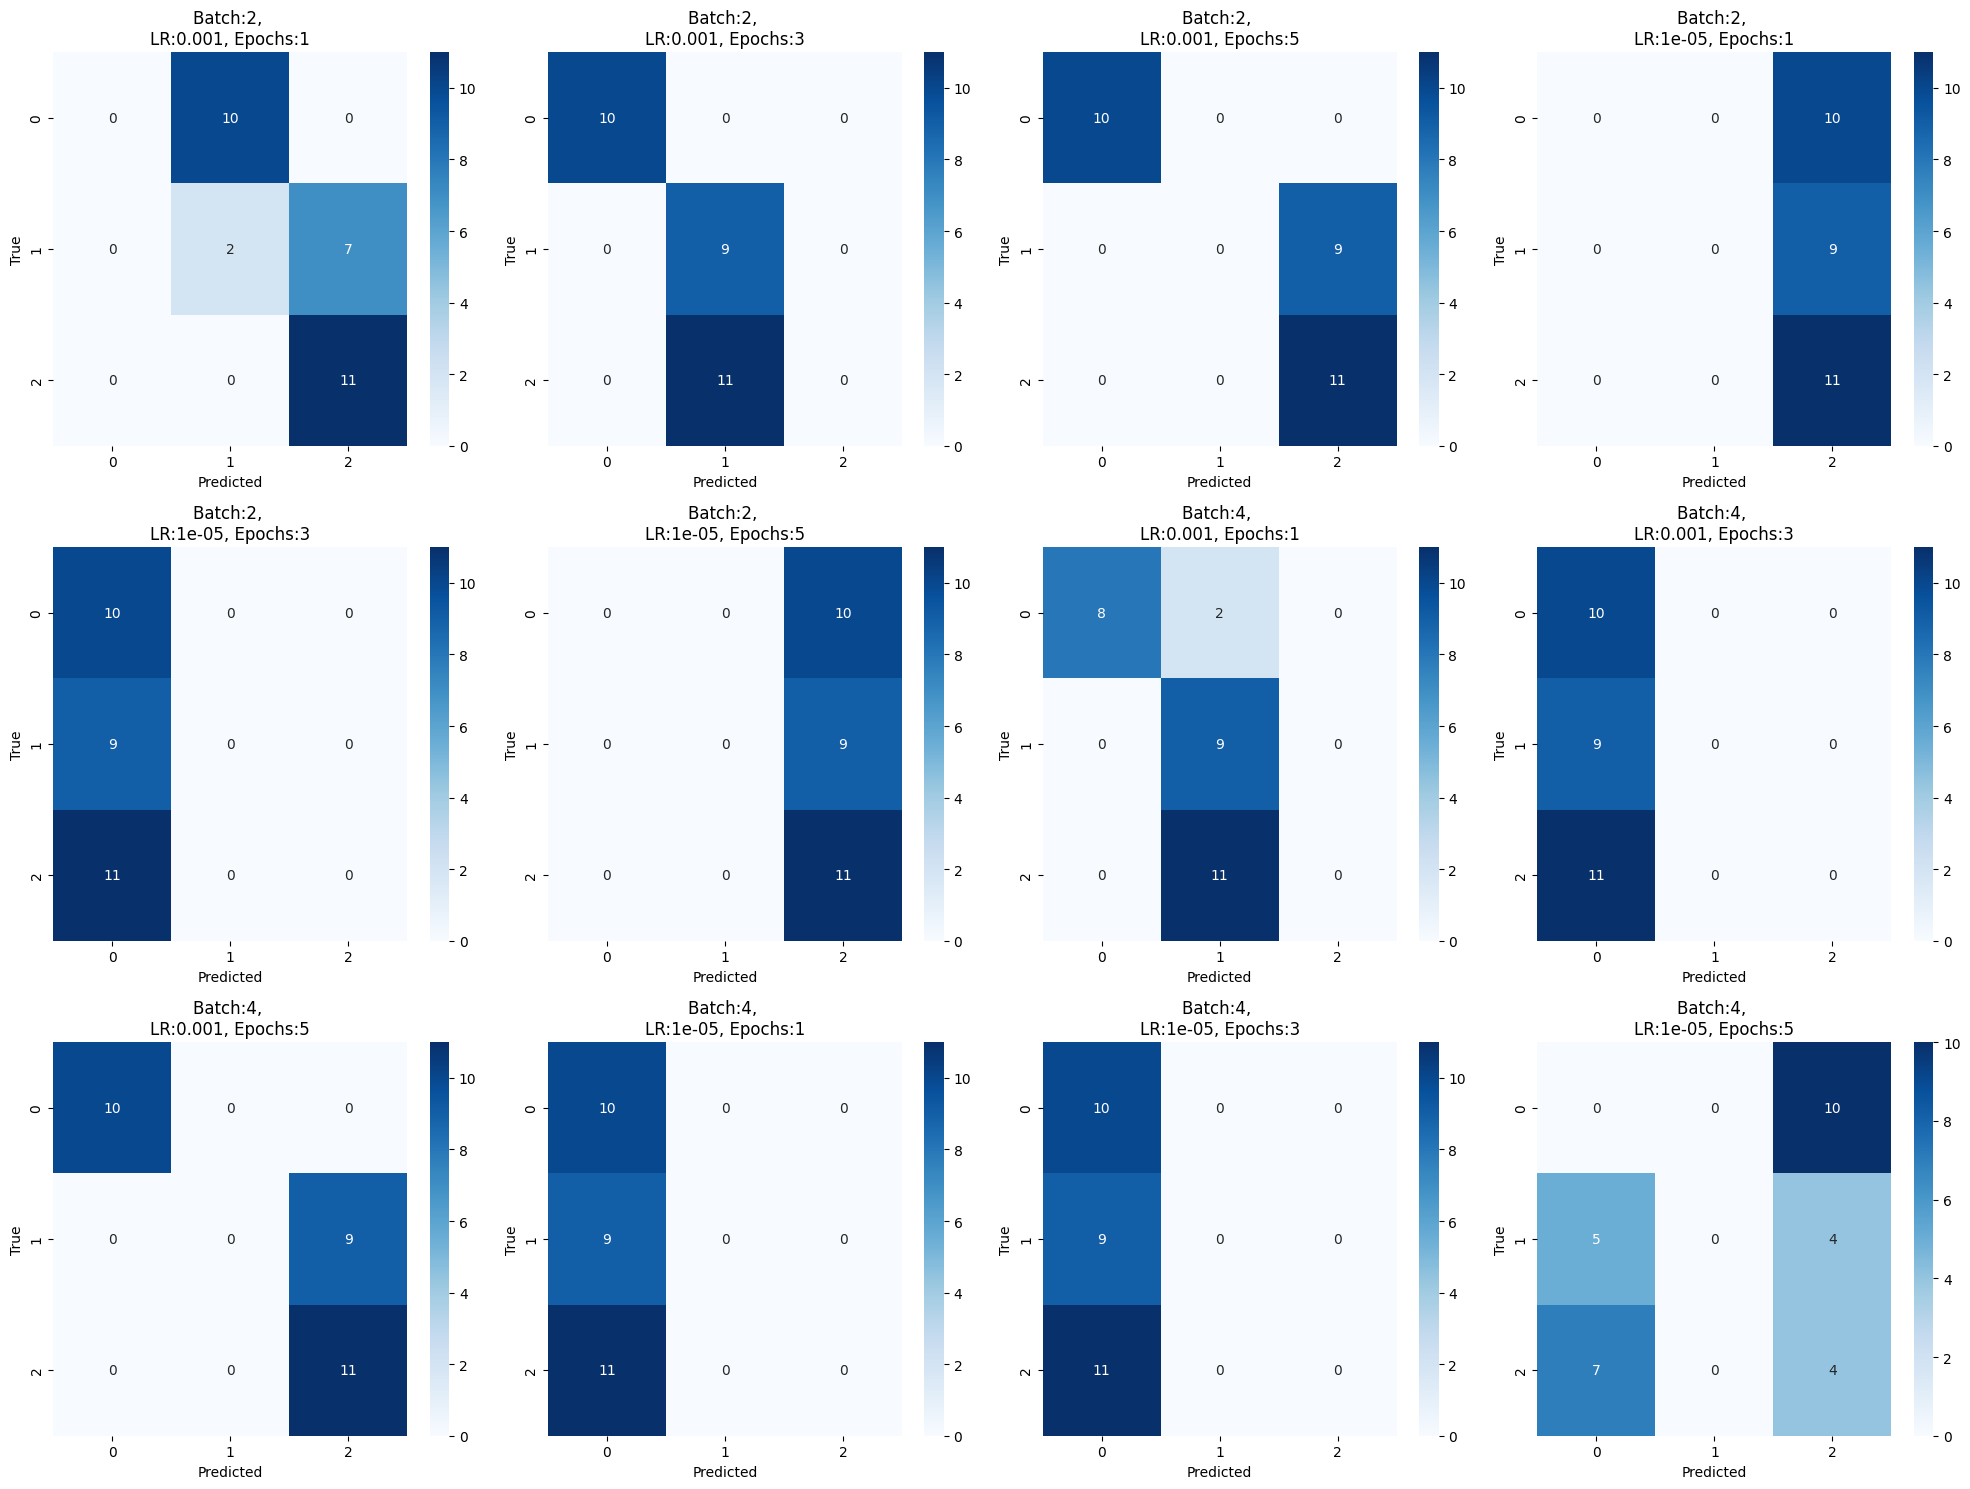

In [14]:
# Plotting confusion matrix for all configurations
plt.figure(figsize=(20, 15))
for i, result in enumerate(results):
    plt.subplot(3, 4, i + 1)  # 3 rows, 4 columns to accommodate all 12 configurations
    cm = confusion_matrix(result['y_test_classes'], result['y_pred_classes'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Batch:{result["batch_size"]}, \nLR:{result["learning_rate"]}, Epochs:{result["epochs"]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
plt.tight_layout()

plt.show()


In [15]:
best_result = max(results, key=lambda x: x['accuracy'])
print("\nBest configuration:")
print(f"Batch size: {best_result['batch_size']}")
print(f"Learning rate: {best_result['learning_rate']}")
print(f"Epochs: {best_result['epochs']}")
print(f"Accuracy: {best_result['accuracy']:.4f}")
print(f"F1 Score: {best_result['f1']:.4f}")



Best configuration:
Batch size: 2
Learning rate: 0.001
Epochs: 5
Accuracy: 0.7000
F1 Score: 0.5935


## Task 2


In [18]:
%pip install autogluon

  Using cached autogluon.core-1.2-py3-none-any.whl.metadata (12 kB)
  Using cached autogluon.features-1.2-py3-none-any.whl.metadata (11 kB)
  Using cached autogluon.multimodal-1.2-py3-none-any.whl.metadata (12 kB)
Using cached autogluon.core-1.2-py3-none-any.whl (266 kB)
Using cached autogluon.features-1.2-py3-none-any.whl (64 kB)
Using cached autogluon.multimodal-1.2-py3-none-any.whl (429 kB)
Note: you may need to restart the kernel to use updated packages.


In [19]:
from autogluon import tabular
print(tabular.__version__)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


1.2


In [20]:
import autogluon

autogluon.tabular.models.tabular_nn.hyperparameters.parameters

<module 'autogluon.tabular.models.tabular_nn.hyperparameters.parameters' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/autogluon/tabular/models/tabular_nn/hyperparameters/parameters.py'>

In [ ]:
from autogluon.tabular import TabularPredictor, TabularDataset
from autogluon.common import space
from sklearn.datasets import load_iris

# Load data
iris = load_iris()
df = TabularDataset(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Custom hyperparameter search space
hyperparameters = {
    'NN_TORCH': {
        'optimizer': space.Categorical('adam', 'sgd'),
        'learning_rate': space.Real(1e-4, 0.1, log=True),  # 0.0001 to 0.1
        'batch_size': space.Categorical(16, 32, 64),  # Test different batch sizes
        'num_epochs': space.Int(50, 150)
    },
    'GBM': {
        'extra_trees': space.Categorical(True, False)
    }
}

# Configure random search
predictor = TabularPredictor(label='species').fit(
    train_data=df,
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs={
        'num_trials': 10,  # Number of random combinations to test
        'scheduler': 'local',
        'searcher': 'random'
    },
    time_limit=300  # 5 minutes for search
)

# View results
leaderboard = predictor.leaderboard(df)
print(leaderboard)


No model was trained during hyperparameter tuning NeuralNetTorch... Skipping this model.
No base models to train on, skipping auxiliary stack level 2...
AutoGluon training complete, total runtime = 9.27s ... Best model: None


RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.

In [ ]:
import pandas as pd

# Create train_data DataFrame from X_train and y_train
# Convert the one-hot encoded labels back to single class labels
y_train_labels = np.argmax(y_train, axis=1)

# Create a DataFrame with features and label
train_data = pd.DataFrame(X_train, columns=['feature_' + str(i) for i in range(4)])
train_data['label'] = y_train_labels

predictor_sst_rs = TextPredictor(path='ag_text_iris_random_search', label='label', eval_metric='acc')
predictor_sst_rs.set_verbosity(0)
predictor_sst_rs.fit(train_data,
                     hyperparameters=custom_hyperparameter_search(),
                     time_limit=60 * 2,
                     num_trials=4,
                     seed=123)

NameError: name 'np' is not defined

No path specified. Models will be saved in: "AutogluonModels/ag-20250223_122203"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.3
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112
CPU Count:          8
Memory Avail:       1.71 GB / 8.00 GB (21.4%)
Disk Space Avail:   86.29 GB / 228.27 GB (37.8%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. R

RuntimeError: No models were trained successfully during fit(). Inspect the log output or increase verbosity to determine why no models were fit. Alternatively, set `raise_on_no_models_fitted` to False during the fit call.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import (accuracy_score, f1_score, 
                             confusion_matrix, classification_report)
import keras_tuner as kt
import wandb
from wandb.keras import WandbCallback

# Initialize W&B
wandb.init(project="iris-hyperparameter-tuning", entity="your-username")

# Load and preprocess data
iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

# One-hot encode labels
encoder = OneHotEncoder()
y = encoder.fit_transform(y).toarray()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.125, stratify=y_train, random_state=42
)

# Normalize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to build model with hyperparameters
def build_model(hp=None):
    model = keras.Sequential()
    
    model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
    
    # Output layer
    model.add(layers.Dense(3, activation='softmax'))
    
    # Hyperparameters
    if hp:
        lr = hp.Choice('learning_rate', [1e-3, 1e-5])
    else:
        lr = 0.001
        
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Task 1: Manual Hyperparameter Search
batch_sizes = [2, 4]
learning_rates = [1e-3, 1e-5]
epochs_list = [1, 3, 5]

results = []

for batch_size in batch_sizes:
    for lr in learning_rates:
        for epochs in epochs_list:
            # W&B run initialization
            run = wandb.init(project="iris-hyperparameter-tuning",
                            reinit=True,
                            config={
                                "batch_size": batch_size,
                                "learning_rate": lr,
                                "epochs": epochs
                            })
            
            # Build and train model
            model = build_model()
            history = model.fit(X_train, y_train,
                                validation_data=(X_val, y_val),
                                epochs=epochs,
                                batch_size=batch_size,
                                verbose=0,
                                callbacks=[WandbCallback()])
            
            # Evaluate
            y_pred = model.predict(X_test)
            y_test_class = np.argmax(y_test, axis=1)
            y_pred_class = np.argmax(y_pred, axis=1)
            
            # Calculate metrics
            acc = accuracy_score(y_test_class, y_pred_class)
            f1 = f1_score(y_test_class, y_pred_class, average='weighted')
            
            # Log confusion matrix
            cm = confusion_matrix(y_test_class, y_pred_class)
            wandb.log({"confusion_matrix": wandb.plot.confusion_matrix(
                probs=None,
                y_true=y_test_class,
                preds=y_pred_class,
                class_names=iris.target_names)})
            
            # Store results
            results.append({
                'batch_size': batch_size,
                'learning_rate': lr,
                'epochs': epochs,
                'accuracy': acc,
                'f1_score': f1
            })
            
            # Plot sample predictions
            fig, ax = plt.subplots(figsize=(10, 4))
            ax.barh(iris.target_names, y_pred[0])
            ax.set_title(f"Sample Prediction (True: {iris.target_names[y_test_class[0]]})")
            wandb.log({"sample_prediction": wandb.Image(plt)})
            plt.close()
            
            run.finish()

# Create manual results dataframe
manual_results = pd.DataFrame(results)

# Task 2: Automated Hyperparameter Tuning
def tuner_builder(hp):
    model = keras.Sequential()
    model.add(layers.Dense(16, activation='relu', input_shape=(4,)))
    model.add(layers.Dense(3, activation='softmax'))
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-5])
    hp_batch_size = hp.Choice('batch_size', values=[2, 4])
    
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define search strategies
tuners = {
    'grid': kt.GridSearch,
    'random': kt.RandomSearch,
    'hyperband': kt.Hyperband,
    'bayesian': kt.BayesianOptimization
}

auto_results = []

for tuner_name, tuner_class in tuners.items():
    tuner = tuner_class(
        tuner_builder,
        objective='val_accuracy',
        max_trials=12,
        project_name=f'iris_tuning_{tuner_name}'
    )
    
    tuner.search(X_train, y_train,
                 epochs=5,
                 validation_data=(X_val, y_val),
                 callbacks=[WandbCallback()])
    
    # Get best model
    best_model = tuner.get_best_models(num_models=1)[0]
    
    # Evaluate
    y_pred = best_model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)
    acc = accuracy_score(y_test_class, y_pred_class)
    f1 = f1_score(y_test_class, y_pred_class, average='weighted')
    
    auto_results.append({
        'method': tuner_name,
        'accuracy': acc,
        'f1_score': f1
    })

# Create comparison table
auto_results_df = pd.DataFrame(auto_results)

# Plotting and Analysis
# Training vs Validation Loss Plot
plt.figure(figsize=(10, 6))
for idx, row in manual_results.iterrows():
    label = f"BS:{row['batch_size']}, LR:{row['learning_rate']}, Epochs:{row['epochs']}"
    plt.plot([row['accuracy']], [row['f1_score']], 'o', label=label)
plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Manual Tuning: Accuracy vs F1 Score')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.tight_layout()
wandb.log({"manual_tuning_performance": wandb.Image(plt)})
plt.close()

# Compare manual vs automated
final_comparison = pd.concat([
    manual_results.assign(method='manual').groupby('method').mean(),
    auto_results_df.set_index('method')
])

print("Final Comparison:")
print(final_comparison)

# Hypothetical relationships analysis
wandb.log({
    "epochs_vs_accuracy": wandb.plot.line_series(
        xs=manual_results['epochs'],
        ys=[manual_results['accuracy']],
        keys=["Accuracy"],
        title="Epochs vs Accuracy",
        xname="Epochs"),
    "batch_size_vs_f1": wandb.plot.line_series(
        xs=manual_results['batch_size'],
        ys=[manual_results['f1_score']],
        keys=["F1 Score"],
        title="Batch Size vs F1 Score",
        xname="Batch Size")
})

# Close W&B
wandb.finish()

ModuleNotFoundError: No module named 'keras_tuner'